<a href="https://colab.research.google.com/github/KoMurase/movie_research_2/blob/master/check_and_prepro_data_2017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [343]:
!cp -r '/content/drive/MyDrive/Movies/data/mojo_japan/' '/content/'
!cp -r '/content/drive/MyDrive/Movies/data/metadata_filmarks/' '/content/'

In [344]:
!pip install japanize_matplotlib
import pandas as pd
import codecs 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import japanize_matplotlib

import warnings

In [345]:
def read_data(path, encode_type):
    
    with codecs.open(path, "r", encode_type, "ignore") as file:
        data = pd.read_csv(file, delimiter=",")
    
    return data 

In [346]:
meta_data = '/content/mojo_japan/'
metadata_filmarks = '/content/metadata_filmarks/'

data = read_data(meta_data+'data_2017.csv',encode_type="Shift-JIS")
data_filmarks = read_data(metadata_filmarks + 'data_2017_2020_11_25_015410.csv',encode_type='utf-8') 

監督，原作，キャストに関してカウントエンコーディングを行う

In [347]:
data.head(2)

,Rank,Title,Title (ja),Theaters,Release Date,Distributor,Gross,Total Gross,url,age,Filmarks URL
0,1,Beauty and the Beast,美女と野獣,773,Walt Disney Pictures\n\n,Walt Disney Pictures\n\n,"$107,918,441","$110,790,534",https://www.boxofficemojo.com/year/2017/?area=...,2017,https://filmarks.com/movies/61335
1,2,Despicable Me 3,怪盗グルーのミニオン危機一発,375,Toho-Towa\n\n,Toho-Towa\n\n,"$64,950,363","$66,229,119",https://www.boxofficemojo.com/year/2017/?area=...,2017,https://filmarks.com/movies/71583


In [348]:
data_filmarks.head(2)

,レビュー数,平均スコア,header情報,タイトル(日本名),タイトル(英名),製作日,上映日：製作国：上映時間,年(上映日),月(上映日),日(上映日),製作国,上映時間,ジャンル,あらすじ,監督,脚本,原作,キャスト,URL
0,174960件,4.0点,美女と野獣 - 映画情報・レビュー・評価・あらすじ・動画配信 | Filmarks映画,美女と野獣,Beauty and The Beast,2017年,上映日：2017年04月21日 ／ 製作国：アメリカ ／ 上映時間：130分,NaN,NaN,NaN,製作国：アメリカ,130,恋愛ミュージカル,'ひとりの美しい王子が、呪いによって醜い野獣の姿に変えられてしまう。魔女が残した一輪のバラの...,['ビル・コンドン'],['スティーヴン・チョボスキー'],[],"['ビル・コンドン', 'スティーヴン・チョボスキー', 'エマ・ワトソン', 'ダン・ステ...",https://filmarks.com/movies/61335
1,31903件,3.6点,怪盗グルーのミニオン大脱走 - 映画情報・レビュー・評価・あらすじ・動画配信 | Filma...,怪盗グルーのミニオン大脱走,Despicable Me 3,2017年,上映日：2017年07月21日 ／ 製作国：アメリカ ／ 上映時間：90分,NaN,NaN,NaN,製作国：アメリカ,90,アニメ,'晴れて結婚したグルーとルーシーの前に、人類を脅かす新たな悪党バルタザール・ブラットが立ちは...,"['ピエール・コフィン', 'カイル・バルタ']",['ケン・ダウリオ'],[],"['ピエール・コフィン', 'カイル・バルタ', 'ケン・ダウリオ', 'スティーヴ・カレル...",https://filmarks.com/movies/71583


In [349]:
data.shape, data_filmarks.shape

((190, 11), (188, 19))

data_filmarks <- data　という形でマージする

In [350]:
data_filmarks.head(2)

,レビュー数,平均スコア,header情報,タイトル(日本名),タイトル(英名),製作日,上映日：製作国：上映時間,年(上映日),月(上映日),日(上映日),製作国,上映時間,ジャンル,あらすじ,監督,脚本,原作,キャスト,URL
0,174960件,4.0点,美女と野獣 - 映画情報・レビュー・評価・あらすじ・動画配信 | Filmarks映画,美女と野獣,Beauty and The Beast,2017年,上映日：2017年04月21日 ／ 製作国：アメリカ ／ 上映時間：130分,NaN,NaN,NaN,製作国：アメリカ,130,恋愛ミュージカル,'ひとりの美しい王子が、呪いによって醜い野獣の姿に変えられてしまう。魔女が残した一輪のバラの...,['ビル・コンドン'],['スティーヴン・チョボスキー'],[],"['ビル・コンドン', 'スティーヴン・チョボスキー', 'エマ・ワトソン', 'ダン・ステ...",https://filmarks.com/movies/61335
1,31903件,3.6点,怪盗グルーのミニオン大脱走 - 映画情報・レビュー・評価・あらすじ・動画配信 | Filma...,怪盗グルーのミニオン大脱走,Despicable Me 3,2017年,上映日：2017年07月21日 ／ 製作国：アメリカ ／ 上映時間：90分,NaN,NaN,NaN,製作国：アメリカ,90,アニメ,'晴れて結婚したグルーとルーシーの前に、人類を脅かす新たな悪党バルタザール・ブラットが立ちは...,"['ピエール・コフィン', 'カイル・バルタ']",['ケン・ダウリオ'],[],"['ピエール・コフィン', 'カイル・バルタ', 'ケン・ダウリオ', 'スティーヴ・カレル...",https://filmarks.com/movies/71583


In [351]:
#無視したい列を除く
Sysnopsis_data = data_filmarks[['タイトル(英名)','あらすじ']]
data_filmarks = data_filmarks.drop(['レビュー数','平均スコア', 'header情報',  'あらすじ' ], axis=1) ##'タイトル(日本名)','タイトル(英名)'
data = data.drop(['url','Release Date'], axis=1) #'Title','Title (ja)'


In [352]:
data = data.rename(columns={'Filmarks URL':'URL'}) 

In [353]:
data.shape, data_filmarks.shape

((190, 9), (188, 15))

In [354]:
df = data_filmarks.merge(data, how='left',on='URL')

In [355]:
df

,タイトル(日本名),タイトル(英名),製作日,上映日：製作国：上映時間,年(上映日),月(上映日),日(上映日),製作国,上映時間,ジャンル,監督,脚本,原作,キャスト,URL,Rank,Title,Title (ja),Theaters,Distributor,Gross,Total Gross,age
0,美女と野獣,Beauty and The Beast,2017年,上映日：2017年04月21日 ／ 製作国：アメリカ ／ 上映時間：130分,NaN,NaN,NaN,製作国：アメリカ,130,恋愛ミュージカル,['ビル・コンドン'],['スティーヴン・チョボスキー'],[],"['ビル・コンドン', 'スティーヴン・チョボスキー', 'エマ・ワトソン', 'ダン・ステ...",https://filmarks.com/movies/61335,1,Beauty and the Beast,美女と野獣,773,Walt Disney Pictures\n\n,"$107,918,441","$110,790,534",2017
1,怪盗グルーのミニオン大脱走,Despicable Me 3,2017年,上映日：2017年07月21日 ／ 製作国：アメリカ ／ 上映時間：90分,NaN,NaN,NaN,製作国：アメリカ,90,アニメ,"['ピエール・コフィン', 'カイル・バルタ']",['ケン・ダウリオ'],[],"['ピエール・コフィン', 'カイル・バルタ', 'ケン・ダウリオ', 'スティーヴ・カレル...",https://filmarks.com/movies/71583,2,Despicable Me 3,怪盗グルーのミニオン危機一発,375,Toho-Towa\n\n,"$64,950,363","$66,229,119",2017
2,パイレーツ・オブ・カリビアン 最後の海賊,Pirates of the Caribbean: Dead Men Tell No Tales,2017年,上映日：2017年07月01日 ／ 製作国：アメリカ ／ 上映時間：129分,NaN,NaN,NaN,製作国：アメリカ,129,アクションアドベンチャー・冒険,"['ヨアヒム・ローニング', 'エスペン・サンドベリ']",[],[],"['ヨアヒム・ローニング', 'エスペン・サンドベリ', 'ジョニー・デップ', 'オーラン...",https://filmarks.com/movies/56771,3,Pirates of the Caribbean: Dead Men Tell No Tales,パイレーツ・オブ・カリビアン/最後の海賊,-,Walt Disney Pictures\n\n,"$59,765,357","$59,765,357",2017
3,君の名は。,NaN,2016年,上映日：2016年08月26日 ／ 製作国：日本 ／ 上映時間：107分,NaN,NaN,NaN,製作国：日本,107,恋愛アニメ,['新海誠'],['新海誠'],[],"['新海誠', '新海誠', 'RADWIMPS', '神木隆之介', '上白石萌音', '...",https://filmarks.com/movies/65931,4,Your Name.,君の名は,301,Toho\n\n,"$49,762,752","$233,794,134",2017
4,モアナと伝説の海,Moana,2016年,上映日：2017年03月10日 ／ 製作国：アメリカ ／ 上映時間：107分,NaN,NaN,NaN,製作国：アメリカ,107,ファミリーアニメミュージカル,"['ロン・クレメンツ', 'ジョン・マスカー']",[],[],"['ロン・クレメンツ', 'ジョン・マスカー', 'アウリイ・カルバーリョ', 'ドウェイン...",https://filmarks.com/movies/60104,5,Moana,モアナと伝説の海,568,Walt Disney Pictures\n\n,"$44,819,180","$45,915,441",2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,ソーセージ・パーティー,Sausage Party,2016年,上映日：2016年11月04日 ／ 製作国：アメリカ ／ 上映時間：89分,NaN,NaN,NaN,製作国：アメリカ,89,コメディアニメ,"['グレッグ・ティアナン', 'コンラッド・ヴァーノン']","['カイル・ハンター', 'セス・ローゲン', 'エヴァン・ゴールドバーグ', 'Ariel...",[],"['グレッグ・ティアナン', 'コンラッド・ヴァーノン', 'カイル・ハンター', 'セス・...",https://filmarks.com/movies/64379,186,Sausage Party,ソーセージ・パーティー,8,Sony Pictures Releasing\n\n,"$37,399","$731,857",2017
186,不都合な真実２：放置された地球,An Inconvenient Sequel: Truth to Power,2017年,上映日：2017年11月17日 ／ 製作国：アメリカ ／ 上映時間：100分,NaN,NaN,NaN,製作国：アメリカ,100,NaN,"['ボニー・コーエン', 'ジョン・シェンク']",[],[],"['ボニー・コーエン', 'ジョン・シェンク', 'アル・ゴア', 'バラク・オバマ', '...",https://filmarks.com/movies/73790,187,An Inconvenient Sequel: Truth to Power,不都合な真実２：放置された地球,10,Paramount Pictures International\n\n,"$21,085","$41,091",2017
187,インフェルノ,Inferno,2016年,上映日：2016年10月28日 ／ 製作国：アメリカハンガリー ／ 上映時間：121分,NaN,NaN,NaN,製作国：アメリカハンガリー,121,ミステリー,['ロン・ハワード'],['デヴィッド・コープ'],[],"['ロン・ハワード', 'デヴィッド・コープ', 'トム・ハンクス', 'フェリシティ・ジョ...",https://filmarks.com/movies/61510,188,Inferno,インフェルノ,483,Sony Pictures Releasing\n\n,"$3,866","$14,456,437",2017
188,ロスト・エモーション,Equals,2015年,上映日：2017年03月04日 ／ 製作国：アメリカ ／ 上映時間：102分,NaN,NaN,NaN,製作国：アメリカ,102,NaN,['ドレイク・ドレマス'],['ネイサン・パーカー'],[],"['ドレイク・ドレマス', 'ネイサン・パーカー', 'クリステン・スチュワート', 'ニコ...",https://filmarks.com/movies/59213,189,Equals,ロスト・エモーション,2,Twin Film\n\n,"$3,087","$3,087",2017


In [356]:
#長さが同じならこっちの方が速い
"""
df = pd.concat([
            data_filmarks.reset_index(drop=True),
            data.reindex(data_filmarks['URL'].values).reset_index(drop=True)         
            ], axis=1)
"""

"\ndf = pd.concat([\n            data_filmarks.reset_index(drop=True),\n            data.reindex(data_filmarks['URL'].values).reset_index(drop=True)         \n            ], axis=1)\n"

In [357]:
df.shape

(190, 23)

In [358]:
df

,タイトル(日本名),タイトル(英名),製作日,上映日：製作国：上映時間,年(上映日),月(上映日),日(上映日),製作国,上映時間,ジャンル,監督,脚本,原作,キャスト,URL,Rank,Title,Title (ja),Theaters,Distributor,Gross,Total Gross,age
0,美女と野獣,Beauty and The Beast,2017年,上映日：2017年04月21日 ／ 製作国：アメリカ ／ 上映時間：130分,NaN,NaN,NaN,製作国：アメリカ,130,恋愛ミュージカル,['ビル・コンドン'],['スティーヴン・チョボスキー'],[],"['ビル・コンドン', 'スティーヴン・チョボスキー', 'エマ・ワトソン', 'ダン・ステ...",https://filmarks.com/movies/61335,1,Beauty and the Beast,美女と野獣,773,Walt Disney Pictures\n\n,"$107,918,441","$110,790,534",2017
1,怪盗グルーのミニオン大脱走,Despicable Me 3,2017年,上映日：2017年07月21日 ／ 製作国：アメリカ ／ 上映時間：90分,NaN,NaN,NaN,製作国：アメリカ,90,アニメ,"['ピエール・コフィン', 'カイル・バルタ']",['ケン・ダウリオ'],[],"['ピエール・コフィン', 'カイル・バルタ', 'ケン・ダウリオ', 'スティーヴ・カレル...",https://filmarks.com/movies/71583,2,Despicable Me 3,怪盗グルーのミニオン危機一発,375,Toho-Towa\n\n,"$64,950,363","$66,229,119",2017
2,パイレーツ・オブ・カリビアン 最後の海賊,Pirates of the Caribbean: Dead Men Tell No Tales,2017年,上映日：2017年07月01日 ／ 製作国：アメリカ ／ 上映時間：129分,NaN,NaN,NaN,製作国：アメリカ,129,アクションアドベンチャー・冒険,"['ヨアヒム・ローニング', 'エスペン・サンドベリ']",[],[],"['ヨアヒム・ローニング', 'エスペン・サンドベリ', 'ジョニー・デップ', 'オーラン...",https://filmarks.com/movies/56771,3,Pirates of the Caribbean: Dead Men Tell No Tales,パイレーツ・オブ・カリビアン/最後の海賊,-,Walt Disney Pictures\n\n,"$59,765,357","$59,765,357",2017
3,君の名は。,NaN,2016年,上映日：2016年08月26日 ／ 製作国：日本 ／ 上映時間：107分,NaN,NaN,NaN,製作国：日本,107,恋愛アニメ,['新海誠'],['新海誠'],[],"['新海誠', '新海誠', 'RADWIMPS', '神木隆之介', '上白石萌音', '...",https://filmarks.com/movies/65931,4,Your Name.,君の名は,301,Toho\n\n,"$49,762,752","$233,794,134",2017
4,モアナと伝説の海,Moana,2016年,上映日：2017年03月10日 ／ 製作国：アメリカ ／ 上映時間：107分,NaN,NaN,NaN,製作国：アメリカ,107,ファミリーアニメミュージカル,"['ロン・クレメンツ', 'ジョン・マスカー']",[],[],"['ロン・クレメンツ', 'ジョン・マスカー', 'アウリイ・カルバーリョ', 'ドウェイン...",https://filmarks.com/movies/60104,5,Moana,モアナと伝説の海,568,Walt Disney Pictures\n\n,"$44,819,180","$45,915,441",2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,ソーセージ・パーティー,Sausage Party,2016年,上映日：2016年11月04日 ／ 製作国：アメリカ ／ 上映時間：89分,NaN,NaN,NaN,製作国：アメリカ,89,コメディアニメ,"['グレッグ・ティアナン', 'コンラッド・ヴァーノン']","['カイル・ハンター', 'セス・ローゲン', 'エヴァン・ゴールドバーグ', 'Ariel...",[],"['グレッグ・ティアナン', 'コンラッド・ヴァーノン', 'カイル・ハンター', 'セス・...",https://filmarks.com/movies/64379,186,Sausage Party,ソーセージ・パーティー,8,Sony Pictures Releasing\n\n,"$37,399","$731,857",2017
186,不都合な真実２：放置された地球,An Inconvenient Sequel: Truth to Power,2017年,上映日：2017年11月17日 ／ 製作国：アメリカ ／ 上映時間：100分,NaN,NaN,NaN,製作国：アメリカ,100,NaN,"['ボニー・コーエン', 'ジョン・シェンク']",[],[],"['ボニー・コーエン', 'ジョン・シェンク', 'アル・ゴア', 'バラク・オバマ', '...",https://filmarks.com/movies/73790,187,An Inconvenient Sequel: Truth to Power,不都合な真実２：放置された地球,10,Paramount Pictures International\n\n,"$21,085","$41,091",2017
187,インフェルノ,Inferno,2016年,上映日：2016年10月28日 ／ 製作国：アメリカハンガリー ／ 上映時間：121分,NaN,NaN,NaN,製作国：アメリカハンガリー,121,ミステリー,['ロン・ハワード'],['デヴィッド・コープ'],[],"['ロン・ハワード', 'デヴィッド・コープ', 'トム・ハンクス', 'フェリシティ・ジョ...",https://filmarks.com/movies/61510,188,Inferno,インフェルノ,483,Sony Pictures Releasing\n\n,"$3,866","$14,456,437",2017
188,ロスト・エモーション,Equals,2015年,上映日：2017年03月04日 ／ 製作国：アメリカ ／ 上映時間：102分,NaN,NaN,NaN,製作国：アメリカ,102,NaN,['ドレイク・ドレマス'],['ネイサン・パーカー'],[],"['ドレイク・ドレマス', 'ネイサン・パーカー', 'クリステン・スチュワート', 'ニコ...",https://filmarks.com/movies/59213,189,Equals,ロスト・エモーション,2,Twin Film\n\n,"$3,087","$3,087",2017


#興行収入についての前処理

In [359]:
df['Gross'] = df['Gross'].apply(lambda x: x.replace('$', '').replace(',', '')).astype(int)
df['Total Gross'] = df['Total Gross'].apply(lambda x: x.replace('$', '').replace(',', '')).astype(int)
df[['Gross', 'Total Gross']]

,Gross,Total Gross
0,107918441,110790534
1,64950363,66229119
2,59765357,59765357
3,49762752,233794134
4,44819180,45915441
...,...,...
185,37399,731857
186,21085,41091
187,3866,14456437
188,3087,3087


#キャスト，監督，脚本の前処理

キャストの中に監督，脚本が混じってしまっているためキャストのみを見れば良さそう

In [360]:
df['directors'] = df['監督'].apply(lambda x: x.replace('[', '')
                               .replace(']', '')
                               .replace('\'', '')
                )

In [361]:
df[['監督', 'directors']]

,監督,directors
0,['ビル・コンドン'],ビル・コンドン
1,"['ピエール・コフィン', 'カイル・バルタ']","ピエール・コフィン, カイル・バルタ"
2,"['ヨアヒム・ローニング', 'エスペン・サンドベリ']","ヨアヒム・ローニング, エスペン・サンドベリ"
3,['新海誠'],新海誠
4,"['ロン・クレメンツ', 'ジョン・マスカー']","ロン・クレメンツ, ジョン・マスカー"
...,...,...
185,"['グレッグ・ティアナン', 'コンラッド・ヴァーノン']","グレッグ・ティアナン, コンラッド・ヴァーノン"
186,"['ボニー・コーエン', 'ジョン・シェンク']","ボニー・コーエン, ジョン・シェンク"
187,['ロン・ハワード'],ロン・ハワード
188,['ドレイク・ドレマス'],ドレイク・ドレマス


In [362]:
df['writers'] = df['脚本'].apply(lambda x: x.replace('[', '')
                               .replace(']', '')
                               .replace('\'', '')
                                  )
                

In [363]:
df[['writers','脚本']]

,writers,脚本
0,スティーヴン・チョボスキー,['スティーヴン・チョボスキー']
1,ケン・ダウリオ,['ケン・ダウリオ']
2,,[]
3,新海誠,['新海誠']
4,,[]
...,...,...
185,"カイル・ハンター, セス・ローゲン, エヴァン・ゴールドバーグ, Ariel Shaffir","['カイル・ハンター', 'セス・ローゲン', 'エヴァン・ゴールドバーグ', 'Ariel..."
186,,[]
187,デヴィッド・コープ,['デヴィッド・コープ']
188,ネイサン・パーカー,['ネイサン・パーカー']


In [364]:
df['casts'] = df['キャスト'].apply(lambda x: x.replace('[', '')
                               .replace(']', '')
                               .replace('\'', '')
                                  )

In [365]:
df[['キャスト', 'casts']]

,キャスト,casts
0,"['ビル・コンドン', 'スティーヴン・チョボスキー', 'エマ・ワトソン', 'ダン・ステ...","ビル・コンドン, スティーヴン・チョボスキー, エマ・ワトソン, ダン・スティーヴンス, ル..."
1,"['ピエール・コフィン', 'カイル・バルタ', 'ケン・ダウリオ', 'スティーヴ・カレル...","ピエール・コフィン, カイル・バルタ, ケン・ダウリオ, スティーヴ・カレル, クリステン・..."
2,"['ヨアヒム・ローニング', 'エスペン・サンドベリ', 'ジョニー・デップ', 'オーラン...","ヨアヒム・ローニング, エスペン・サンドベリ, ジョニー・デップ, オーランド・ブルーム, ..."
3,"['新海誠', '新海誠', 'RADWIMPS', '神木隆之介', '上白石萌音', '...","新海誠, 新海誠, RADWIMPS, 神木隆之介, 上白石萌音, 長澤まさみ, 市原悦子,..."
4,"['ロン・クレメンツ', 'ジョン・マスカー', 'アウリイ・カルバーリョ', 'ドウェイン...","ロン・クレメンツ, ジョン・マスカー, アウリイ・カルバーリョ, ドウェイン・ジョンソン, ..."
...,...,...
185,"['グレッグ・ティアナン', 'コンラッド・ヴァーノン', 'カイル・ハンター', 'セス・...","グレッグ・ティアナン, コンラッド・ヴァーノン, カイル・ハンター, セス・ローゲン, エヴ..."
186,"['ボニー・コーエン', 'ジョン・シェンク', 'アル・ゴア', 'バラク・オバマ', '...","ボニー・コーエン, ジョン・シェンク, アル・ゴア, バラク・オバマ, ドナルド・トランプ"
187,"['ロン・ハワード', 'デヴィッド・コープ', 'トム・ハンクス', 'フェリシティ・ジョ...","ロン・ハワード, デヴィッド・コープ, トム・ハンクス, フェリシティ・ジョーンズ, オマー..."
188,"['ドレイク・ドレマス', 'ネイサン・パーカー', 'クリステン・スチュワート', 'ニコ...","ドレイク・ドレマス, ネイサン・パーカー, クリステン・スチュワート, ニコラス・ホルト, ..."


In [366]:
#castの列には監督なども入ってしまっている!!!
casts = ''
for c in df['casts'].values:
    casts += c+',' 

In [367]:
casts_list = list(set(casts.replace(' ','').split(',')))

In [368]:
for i, cast in enumerate(casts_list):
    #if cast in data['casts'].loc[i]:
    df[str(cast)] = False

In [369]:
#num=0
for idx in range(len(df['casts'].values)):
    for c in casts_list:
        if c in df['casts'].loc[idx]:
            #print('c:{} \n, data[casts].loc[idx]:{} \n,data[str(c)].loc[idx]:{}\n'.format(
            #    c, df['casts'].loc[idx], df[str(c)].loc[idx]))
            df[str(c)].loc[idx] = True
   # num += 1

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
df['新海誠']

In [ ]:
for c in df.columns:
  if df[c].dtype == bool :
    df[c] = df[c].astype(int)

In [ ]:
df['新海誠']

#「ジャンル」についての前処理

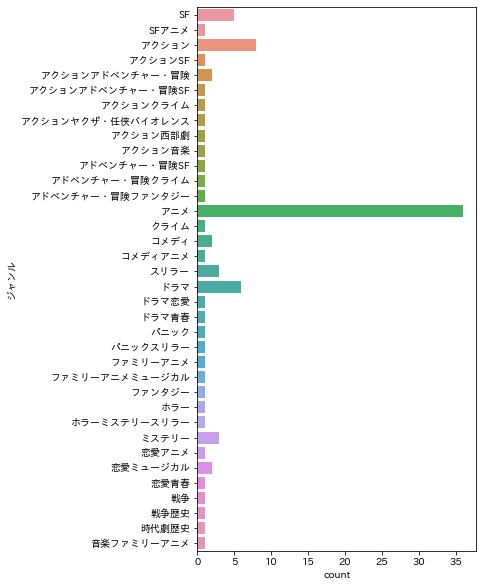

In [370]:
plt.figure(figsize=(5,10))
plt.yticks(rotation=0)
sns.countplot(y=df['ジャンル'].dropna().sort_values())

In [371]:
len(df['ジャンル'].value_counts() ) 

36

In [372]:
Genres = [
    "SF","ドラマ","恋愛","ホラー",
    "戦争","音楽","ミュージカル",
    "青春", "コメディ", "アクション", "アドベンチャー・冒険",
    "クライム", "バイオレンス", "サスペンス",
     "ミステリー", "ファミリー", "ファンタジー", "スリラー",
    "歴史", "時代劇", "西部劇","伝記",
    "パニック", "オムニバス","ドキュメンタリー","スポーツ", "単発ドラマ"
            ]

In [373]:
len(Genres)

27

In [374]:
df['ジャンル'] = df['ジャンル'].fillna('不明') 

In [375]:
for i, G in enumerate(Genres):
    #if cast in data['casts'].loc[i]:
    df['ジャンル_'+str(G)] = False

for idx in range(len(df['ジャンル'].values)):
    for G in Genres:
        if G in df['ジャンル'].loc[idx]:
            #print('c:{} \n, data[casts].loc[idx]:{} \n,data[str(c)].loc[idx]:{}\n'.format(
            #    c, df['casts'].loc[idx], df[str(c)].loc[idx]))
            df['ジャンル_'+str(G)].loc[idx] = True

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [376]:
check = []
for g in Genres:
  if 'ジャンル_'+str(g) in df.columns:
    check.append('ジャンル_'+str(g))
check[0:3]

['ジャンル_SF', 'ジャンル_ドラマ', 'ジャンル_恋愛']

In [377]:
check_df = df[['Gross']+check]

In [378]:
check_df

,Gross,ジャンル_SF,ジャンル_ドラマ,ジャンル_恋愛,ジャンル_ホラー,ジャンル_戦争,ジャンル_音楽,ジャンル_ミュージカル,ジャンル_青春,ジャンル_コメディ,ジャンル_アクション,ジャンル_アドベンチャー・冒険,ジャンル_クライム,ジャンル_バイオレンス,ジャンル_サスペンス,ジャンル_ミステリー,ジャンル_ファミリー,ジャンル_ファンタジー,ジャンル_スリラー,ジャンル_歴史,ジャンル_時代劇,ジャンル_西部劇,ジャンル_伝記,ジャンル_パニック,ジャンル_オムニバス,ジャンル_ドキュメンタリー,ジャンル_スポーツ,ジャンル_単発ドラマ
0,107918441,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,64950363,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,59765357,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,49762752,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,44819180,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,37399,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
186,21085,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
187,3866,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
188,3087,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


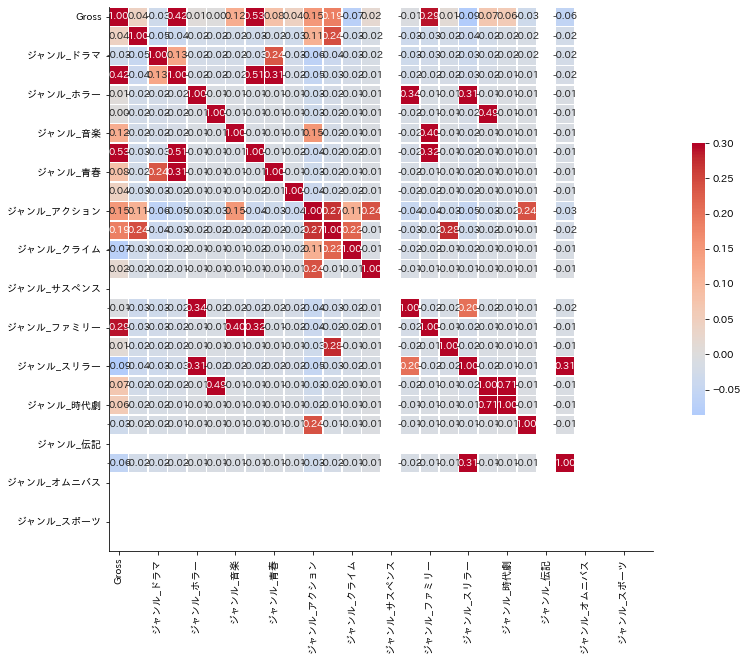

In [379]:
check_df = check_df.dropna(axis='columns') 
corr = check_df.corr()
g = sns.heatmap(corr,  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
g.figure.set_size_inches(14,10)

plt.show()

# 「上映日：製作国：上映時間」についての前処理

In [380]:
df[df['上映日：製作国：上映時間'].apply(lambda x: True if '製作国' in x else False ) == False]

,タイトル(日本名),タイトル(英名),製作日,上映日：製作国：上映時間,年(上映日),月(上映日),日(上映日),製作国,上映時間,ジャンル,監督,脚本,原作,キャスト,URL,Rank,Title,Title (ja),Theaters,Distributor,Gross,Total Gross,age,directors,writers,casts,,リチャード・E・グラント,マ・ドンソク,吉川靖子,花江夏樹,江原正士,スタンリー・トゥッチ,デヴィッド・ベッカム,イアン・グレン,鈴木昴秀,小杉十郎太,松岡禎丞,シェー・ウィガム,ジョン・タトゥーロ,...,F・スコット・フレイジャー,森見登美彦,エイザ・ゴンザレス,ジェームズ・ガン,小松菜奈,クレモンティーヌ・ニコルソン,ハン・ジウン,西田敏行,マーティン・クレバ,ねりお弘晃,マディー・ジーグラー,メアリー・マレン,内田有紀,ジャンル_SF,ジャンル_ドラマ,ジャンル_恋愛,ジャンル_ホラー,ジャンル_戦争,ジャンル_音楽,ジャンル_ミュージカル,ジャンル_青春,ジャンル_コメディ,ジャンル_アクション,ジャンル_アドベンチャー・冒険,ジャンル_クライム,ジャンル_バイオレンス,ジャンル_サスペンス,ジャンル_ミステリー,ジャンル_ファミリー,ジャンル_ファンタジー,ジャンル_スリラー,ジャンル_歴史,ジャンル_時代劇,ジャンル_西部劇,ジャンル_伝記,ジャンル_パニック,ジャンル_オムニバス,ジャンル_ドキュメンタリー,ジャンル_スポーツ,ジャンル_単発ドラマ
28,NaN,NaN,2017年,上映日：2017年02月11日 ／ 上映時間：120分,NaN,NaN,NaN,NaN,120,不明,['橋本一'],['太田愛'],[],"['橋本一', '太田愛', '水谷豊', '反町隆史', '仲間由紀恵', '北村一輝',...",https://filmarks.com/movies/71128,29,Partners: The Movie IV,相棒 劇場版W 首都クライシス 人質は50万人！特命係 最後の決断,347,Toei Company\n\n,15104791,15104791,2017,橋本一,太田愛,"橋本一, 太田愛, 水谷豊, 反町隆史, 仲間由紀恵, 北村一輝, 及川光博, 石坂浩二, ...",True,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
173,仮面ライダー平成ジェネレーションズ Dr.パックマン対エグゼイド＆ゴースト with レジェ...,NaN,2016年,上映日：2016年12月10日 ／ 上映時間：89分,NaN,NaN,NaN,NaN,89,不明,[],[],['石ノ森章太郎'],"['石ノ森章太郎', '飯島寛騎', '西銘駿', '棚橋弘至', '佐野史郎']",https://filmarks.com/movies/70958,173,Kamen Rider Heisei Generations: Dr. Pac-Man vs...,仮面ライダー平成ジェネレーションズ Dr.パックマン対エグゼイド＆ゴースト with レジェ...,-,Toei Company\n\n,281194,6394531,2017,,,"石ノ森章太郎, 飯島寛騎, 西銘駿, 棚橋弘至, 佐野史郎",True,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [381]:
df[df['上映日：製作国：上映時間'].apply(lambda x: True if '製作国' in x else False ) == False].drop(index=28, axis=0)

,タイトル(日本名),タイトル(英名),製作日,上映日：製作国：上映時間,年(上映日),月(上映日),日(上映日),製作国,上映時間,ジャンル,監督,脚本,原作,キャスト,URL,Rank,Title,Title (ja),Theaters,Distributor,Gross,Total Gross,age,directors,writers,casts,,リチャード・E・グラント,マ・ドンソク,吉川靖子,花江夏樹,江原正士,スタンリー・トゥッチ,デヴィッド・ベッカム,イアン・グレン,鈴木昴秀,小杉十郎太,松岡禎丞,シェー・ウィガム,ジョン・タトゥーロ,...,F・スコット・フレイジャー,森見登美彦,エイザ・ゴンザレス,ジェームズ・ガン,小松菜奈,クレモンティーヌ・ニコルソン,ハン・ジウン,西田敏行,マーティン・クレバ,ねりお弘晃,マディー・ジーグラー,メアリー・マレン,内田有紀,ジャンル_SF,ジャンル_ドラマ,ジャンル_恋愛,ジャンル_ホラー,ジャンル_戦争,ジャンル_音楽,ジャンル_ミュージカル,ジャンル_青春,ジャンル_コメディ,ジャンル_アクション,ジャンル_アドベンチャー・冒険,ジャンル_クライム,ジャンル_バイオレンス,ジャンル_サスペンス,ジャンル_ミステリー,ジャンル_ファミリー,ジャンル_ファンタジー,ジャンル_スリラー,ジャンル_歴史,ジャンル_時代劇,ジャンル_西部劇,ジャンル_伝記,ジャンル_パニック,ジャンル_オムニバス,ジャンル_ドキュメンタリー,ジャンル_スポーツ,ジャンル_単発ドラマ
173,仮面ライダー平成ジェネレーションズ Dr.パックマン対エグゼイド＆ゴースト with レジェ...,NaN,2016年,上映日：2016年12月10日 ／ 上映時間：89分,NaN,NaN,NaN,NaN,89,不明,[],[],['石ノ森章太郎'],"['石ノ森章太郎', '飯島寛騎', '西銘駿', '棚橋弘至', '佐野史郎']",https://filmarks.com/movies/70958,173,Kamen Rider Heisei Generations: Dr. Pac-Man vs...,仮面ライダー平成ジェネレーションズ Dr.パックマン対エグゼイド＆ゴースト with レジェ...,-,Toei Company\n\n,281194,6394531,2017,,,"石ノ森章太郎, 飯島寛騎, 西銘駿, 棚橋弘至, 佐野史郎",True,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [382]:
df.loc[28,'タイトル(日本名)'] = '相棒 劇場版Ⅳ 首都クライシス 人質は50万人！特命係 最後の決断'
df.loc[28,'上映日：製作国：上映時間'] = '上映日：2017年02月11日 ／ 製作国 : 日本 ／ 上映時間：120分	'

In [383]:
df.loc[28]

タイトル(日本名)               相棒 劇場版Ⅳ 首都クライシス 人質は50万人！特命係 最後の決断
タイトル(英名)                                              NaN
製作日                                                 2017年
上映日：製作国：上映時間     上映日：2017年02月11日 ／ 製作国 : 日本 ／ 上映時間：120分\t
年(上映日)                                                NaN
                                   ...                   
ジャンル_パニック                                           False
ジャンル_オムニバス                                          False
ジャンル_ドキュメンタリー                                       False
ジャンル_スポーツ                                           False
ジャンル_単発ドラマ                                          False
Name: 28, Length: 2258, dtype: object

In [384]:
df[df['上映日：製作国：上映時間'].apply(lambda x: True if '製作国' in x else False ) == False]

,タイトル(日本名),タイトル(英名),製作日,上映日：製作国：上映時間,年(上映日),月(上映日),日(上映日),製作国,上映時間,ジャンル,監督,脚本,原作,キャスト,URL,Rank,Title,Title (ja),Theaters,Distributor,Gross,Total Gross,age,directors,writers,casts,,リチャード・E・グラント,マ・ドンソク,吉川靖子,花江夏樹,江原正士,スタンリー・トゥッチ,デヴィッド・ベッカム,イアン・グレン,鈴木昴秀,小杉十郎太,松岡禎丞,シェー・ウィガム,ジョン・タトゥーロ,...,F・スコット・フレイジャー,森見登美彦,エイザ・ゴンザレス,ジェームズ・ガン,小松菜奈,クレモンティーヌ・ニコルソン,ハン・ジウン,西田敏行,マーティン・クレバ,ねりお弘晃,マディー・ジーグラー,メアリー・マレン,内田有紀,ジャンル_SF,ジャンル_ドラマ,ジャンル_恋愛,ジャンル_ホラー,ジャンル_戦争,ジャンル_音楽,ジャンル_ミュージカル,ジャンル_青春,ジャンル_コメディ,ジャンル_アクション,ジャンル_アドベンチャー・冒険,ジャンル_クライム,ジャンル_バイオレンス,ジャンル_サスペンス,ジャンル_ミステリー,ジャンル_ファミリー,ジャンル_ファンタジー,ジャンル_スリラー,ジャンル_歴史,ジャンル_時代劇,ジャンル_西部劇,ジャンル_伝記,ジャンル_パニック,ジャンル_オムニバス,ジャンル_ドキュメンタリー,ジャンル_スポーツ,ジャンル_単発ドラマ
173,仮面ライダー平成ジェネレーションズ Dr.パックマン対エグゼイド＆ゴースト with レジェ...,NaN,2016年,上映日：2016年12月10日 ／ 上映時間：89分,NaN,NaN,NaN,NaN,89,不明,[],[],['石ノ森章太郎'],"['石ノ森章太郎', '飯島寛騎', '西銘駿', '棚橋弘至', '佐野史郎']",https://filmarks.com/movies/70958,173,Kamen Rider Heisei Generations: Dr. Pac-Man vs...,仮面ライダー平成ジェネレーションズ Dr.パックマン対エグゼイド＆ゴースト with レジェ...,-,Toei Company\n\n,281194,6394531,2017,,,"石ノ森章太郎, 飯島寛騎, 西銘駿, 棚橋弘至, 佐野史郎",True,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [385]:
df.loc[173,'上映日：製作国：上映時間'] = '上映日：2016年12月10日 ／ 製作国 : 日本 ／ 上映時間：89分'

In [386]:
df['上映日：製作国：上映時間'].unique()

array(['上映日：2017年04月21日 ／ 製作国：アメリカ ／ 上映時間：130分',
       '上映日：2017年07月21日 ／ 製作国：アメリカ ／ 上映時間：90分',
       '上映日：2017年07月01日 ／ 製作国：アメリカ ／ 上映時間：129分',
       '上映日：2016年08月26日 ／ 製作国：日本 ／ 上映時間：107分',
       '上映日：2017年03月10日 ／ 製作国：アメリカ ／ 上映時間：107分',
       '上映日：2017年03月17日 ／ 製作国：アメリカ ／ 上映時間：110分',
       '上映日：2017年12月15日 ／ 製作国：アメリカ ／ 上映時間：152分',
       '上映日：2017年04月15日 ／ 製作国：日本 ／ 上映時間：112分',
       '上映日：2017年03月04日 ／ 製作国：日本 ／ 上映時間：101分',
       '上映日：2017年02月24日 ／ 製作国：アメリカ ／ 上映時間：126分',
       '上映日：2017年04月28日 ／ 製作国：アメリカ ／ 上映時間：136分',
       '上映日：2017年07月14日 ／ 製作国：日本 ／ 上映時間：130分',
       '上映日：2017年07月28日 ／ 製作国：日本 ／ 上映時間：115分',
       '上映日：2017年07月15日 ／ 製作国：日本 ／ 上映時間：99分',
       '上映日：2017年07月08日 ／ 製作国：日本 ／ 上映時間：102分',
       '上映日：2017年08月11日 ／ 製作国：アメリカ ／ 上映時間：133分',
       '上映日：2017年06月10日 ／ 製作国：日本 ／ 上映時間：116分',
       '上映日：2017年08月26日 ／ 製作国：日本 ／ 上映時間：149分',
       '上映日：2016年12月23日 ／ 製作国：アメリカ ／ 上映時間：107分',
       '上映日：2017年07月01日 ／ 製作国：日本 ／ 上映時間：125分',
       '上映日：2017年06月10日 ／ 製作国：日本 ／ 上映時間：12

In [387]:
df[df['上映日：製作国：上映時間'] == '製作国：日本 ／ 上映時間：122分']

,タイトル(日本名),タイトル(英名),製作日,上映日：製作国：上映時間,年(上映日),月(上映日),日(上映日),製作国,上映時間,ジャンル,監督,脚本,原作,キャスト,URL,Rank,Title,Title (ja),Theaters,Distributor,Gross,Total Gross,age,directors,writers,casts,,リチャード・E・グラント,マ・ドンソク,吉川靖子,花江夏樹,江原正士,スタンリー・トゥッチ,デヴィッド・ベッカム,イアン・グレン,鈴木昴秀,小杉十郎太,松岡禎丞,シェー・ウィガム,ジョン・タトゥーロ,...,F・スコット・フレイジャー,森見登美彦,エイザ・ゴンザレス,ジェームズ・ガン,小松菜奈,クレモンティーヌ・ニコルソン,ハン・ジウン,西田敏行,マーティン・クレバ,ねりお弘晃,マディー・ジーグラー,メアリー・マレン,内田有紀,ジャンル_SF,ジャンル_ドラマ,ジャンル_恋愛,ジャンル_ホラー,ジャンル_戦争,ジャンル_音楽,ジャンル_ミュージカル,ジャンル_青春,ジャンル_コメディ,ジャンル_アクション,ジャンル_アドベンチャー・冒険,ジャンル_クライム,ジャンル_バイオレンス,ジャンル_サスペンス,ジャンル_ミステリー,ジャンル_ファミリー,ジャンル_ファンタジー,ジャンル_スリラー,ジャンル_歴史,ジャンル_時代劇,ジャンル_西部劇,ジャンル_伝記,ジャンル_パニック,ジャンル_オムニバス,ジャンル_ドキュメンタリー,ジャンル_スポーツ,ジャンル_単発ドラマ
103,ガールズ&パンツァー 第63回戦車道全国高校生大会 総集編,NaN,2017年,製作国：日本 ／ 上映時間：122分,NaN,NaN,NaN,製作国：日本,122,アニメ,['水島努'],[],[],"['水島努', '渕上舞', '茅野愛衣', '尾崎 真実', '中上育実', '井口裕香']",https://filmarks.com/movies/77541,105,Girls und Panzer das Finale: Part I,ガールズ&パンツァー 第63回戦車道全国高校生大会 総集編,-,Showgate\n\n,3017781,3017781,2017,水島努,,"水島努, 渕上舞, 茅野愛衣, 尾崎 真実, 中上育実, 井口裕香",True,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [388]:
#調べました

df.loc[103, '上映日：製作国：上映時間'] = '上映日：2018年9月29日 ／ 製作国：日本 ／ 上映時間：122分'

In [389]:
df['年(上映日)'] = df['上映日：製作国：上映時間'].apply(lambda x: x.replace(' ','').split('／')[0].replace('上映日：','').split('年')[0])
df['月(上映日)'] = df['上映日：製作国：上映時間'].apply(lambda x: x.replace(' ','').split('／')[0].replace('上映日：','').split('年')[1].split('月')[0])
df['日(上映日)'] = df['上映日：製作国：上映時間'].apply(lambda x: x.replace(' ','').split('／')[0].replace('上映日：','').split('年')[1].split('月')[1])

df['製作国'] = df['上映日：製作国：上映時間'].apply(lambda x: x.replace(' ','').split('／')[1].replace('製作国:','').replace('製作国：',''))

In [424]:
df[['年(上映日)','月(上映日)','日(上映日)']].head()

,年(上映日),月(上映日),日(上映日)
0,2017,04,21日
1,2017,07,21日
2,2017,07,01日
3,2016,08,26日
4,2017,03,10日


In [425]:
df['年(上映日)'] = df['年(上映日)'].astype(int)
df['月(上映日)'] = df['月(上映日)'].astype(int)
df['日(上映日)'] = df['日(上映日)'].apply(lambda x: x.replace('日','')).astype(int)

In [426]:
df[['年(上映日)','月(上映日)','日(上映日)']].head()

,年(上映日),月(上映日),日(上映日)
0,2017,4,21
1,2017,7,21
2,2017,7,1
3,2016,8,26
4,2017,3,10


#製作国についての前処理

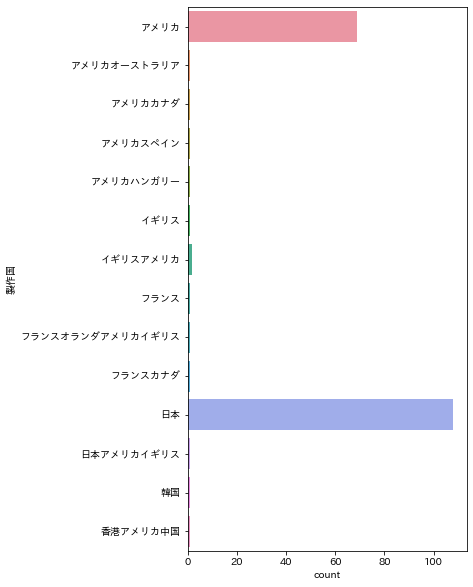

In [395]:
plt.figure(figsize=(5,10))
plt.yticks(rotation=0)
sns.countplot(y=df['製作国'].dropna().sort_values()) 

#日本で見られる映画には一定の偏りがあることが伺える

In [396]:
df['製作国'].unique()

array(['アメリカ', '日本', 'フランスオランダアメリカイギリス', 'イギリスアメリカ', 'アメリカオーストラリア',
       'イギリス', 'アメリカカナダ', '日本アメリカイギリス', 'フランス', '香港アメリカ中国', '韓国',
       'アメリカスペイン', 'フランスカナダ', 'アメリカハンガリー'], dtype=object)

In [397]:
Country = [
       'アメリカ', '日本', 'フランス','オランダ','イギリス','オーストラリア',
       'カナダ', 'フランス', '香港', '中国', '韓国','スペイン','ハンガリー'    
]
##2017年の主要国はこんな感じ

In [398]:
for i, c in enumerate(Country):
  if c in '日本アメリカイギリス':
    print('Yes')

Yes
Yes
Yes


In [399]:
for i, C in enumerate(Country):
    #if cast in data['casts'].loc[i]:
    df['製作国_'+str(C)] = False

for idx in range(len(df['製作国'].values)):
    for C in Country:
        if C in df['製作国'].loc[idx]:
            #print('c:{} \n, data[casts].loc[idx]:{} \n,data[str(c)].loc[idx]:{}\n'.format(
            #    c, df['casts'].loc[idx], df[str(c)].loc[idx]))
            df['製作国_'+str(C)].loc[idx] = True

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [400]:
check = []
for c in Country:
  if '製作国_'+str(c) in df.columns:
    check.append('製作国_'+str(c))

In [401]:
df[check].head(3)

,製作国_アメリカ,製作国_日本,製作国_フランス,製作国_オランダ,製作国_イギリス,製作国_オーストラリア,製作国_カナダ,製作国_フランス,製作国_香港,製作国_中国,製作国_韓国,製作国_スペイン,製作国_ハンガリー
0,True,False,False,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False,False,False


In [402]:
df[check] = df[check].astype(int)
df[check].head(3)

,製作国_アメリカ,製作国_日本,製作国_フランス,製作国_オランダ,製作国_イギリス,製作国_オーストラリア,製作国_カナダ,製作国_フランス,製作国_香港,製作国_中国,製作国_韓国,製作国_スペイン,製作国_ハンガリー
0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0


#カテゴリ変数である製作国と興行収入との関連性を測る




In [403]:
df[['Gross', 'Total Gross']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 0 to 189
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Gross        190 non-null    int64
 1   Total Gross  190 non-null    int64
dtypes: int64(2)
memory usage: 9.5 KB


In [404]:
data

,Rank,Title,Title (ja),Theaters,Distributor,Gross,Total Gross,age,URL
0,1,Beauty and the Beast,美女と野獣,773,Walt Disney Pictures\n\n,"$107,918,441","$110,790,534",2017,https://filmarks.com/movies/61335
1,2,Despicable Me 3,怪盗グルーのミニオン危機一発,375,Toho-Towa\n\n,"$64,950,363","$66,229,119",2017,https://filmarks.com/movies/71583
2,3,Pirates of the Caribbean: Dead Men Tell No Tales,パイレーツ・オブ・カリビアン/最後の海賊,-,Walt Disney Pictures\n\n,"$59,765,357","$59,765,357",2017,https://filmarks.com/movies/56771
3,4,Your Name.,君の名は,301,Toho\n\n,"$49,762,752","$233,794,134",2017,https://filmarks.com/movies/65931
4,5,Moana,モアナと伝説の海,568,Walt Disney Pictures\n\n,"$44,819,180","$45,915,441",2017,https://filmarks.com/movies/60104
...,...,...,...,...,...,...,...,...,...
185,186,Sausage Party,ソーセージ・パーティー,8,Sony Pictures Releasing\n\n,"$37,399","$731,857",2017,https://filmarks.com/movies/64379
186,187,An Inconvenient Sequel: Truth to Power,不都合な真実２：放置された地球,10,Paramount Pictures International\n\n,"$21,085","$41,091",2017,https://filmarks.com/movies/73790
187,188,Inferno,インフェルノ,483,Sony Pictures Releasing\n\n,"$3,866","$14,456,437",2017,https://filmarks.com/movies/61510
188,189,Equals,ロスト・エモーション,2,Twin Film\n\n,"$3,087","$3,087",2017,https://filmarks.com/movies/59213


In [405]:
check_df = df[['Gross']+check]

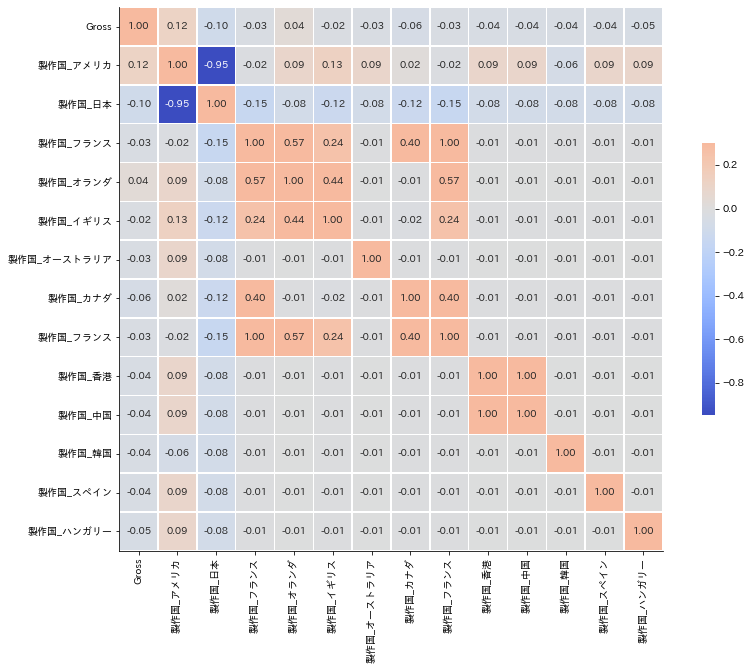

In [406]:
corr = check_df.corr()
g = sns.heatmap(corr,  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
g.figure.set_size_inches(14,10)

plt.show()

# Distributorについて前処理

In [407]:
df['Distributor'] = df['Distributor'].apply(lambda x: x.replace('\n',''))
Distributors = df['Distributor'].unique()

In [408]:
for i, D in enumerate(Distributors):
    #if cast in data['casts'].loc[i]:
    df['映画配給会社_'+str(D)] = False

for idx in range(len(df['Distributor'].values)):
    for D in Distributors:
        if D in df['Distributor'].loc[idx]:
            #print('c:{} \n, data[casts].loc[idx]:{} \n,data[str(c)].loc[idx]:{}\n'.format(
            #    c, df['casts'].loc[idx], df[str(c)].loc[idx]))
            df['映画配給会社_'+str(D)].loc[idx] = True

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [409]:
check = []
for d in Distributors:
  if '映画配給会社_'+str(d) in df.columns:
    check.append('映画配給会社_'+str(d))
check[0:3]

['映画配給会社_Walt Disney Pictures', '映画配給会社_Toho-Towa', '映画配給会社_Toho']

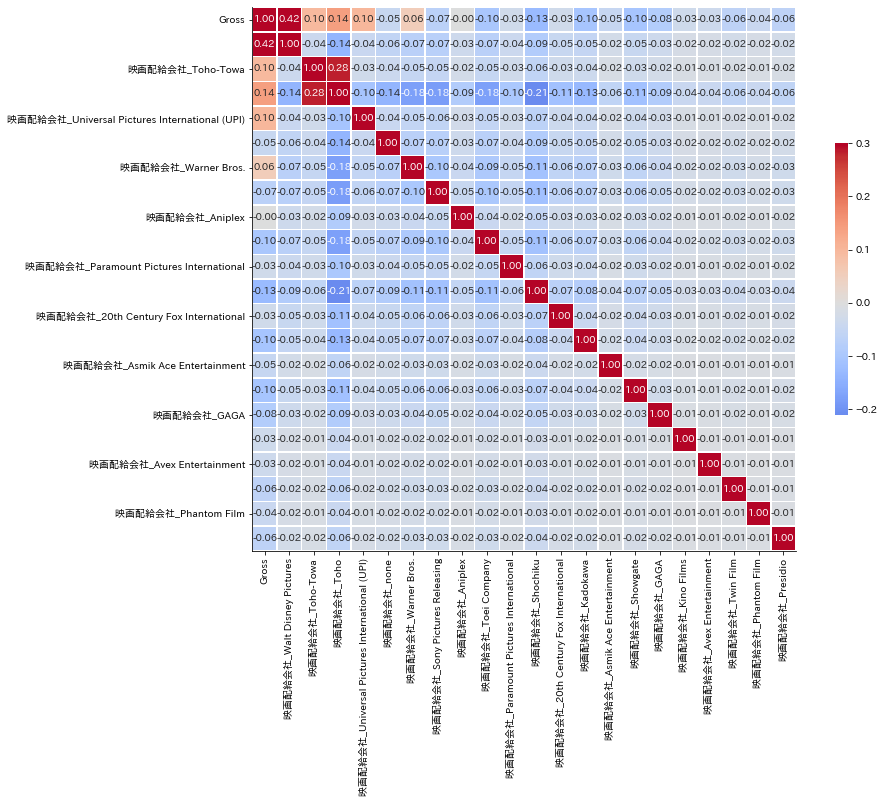

In [410]:
check_df = df[['Gross']+check]
corr = check_df.corr()
g = sns.heatmap(corr,  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
g.figure.set_size_inches(14,10)

plt.show()

#シアター数に関しての前処理

In [411]:
df.Theaters.value_counts()

-      79
291     3
296     3
50      2
155     2
       ..
676     1
585     1
1       1
685     1
101     1
Name: Theaters, Length: 99, dtype: int64

In [412]:
df.Theaters = df.Theaters.apply(lambda x: x.replace(' ','').replace('-', '0'))

In [416]:
df[df.Theaters == '0']

,タイトル(日本名),タイトル(英名),製作日,上映日：製作国：上映時間,年(上映日),月(上映日),日(上映日),製作国,上映時間,ジャンル,監督,脚本,原作,キャスト,URL,Rank,Title,Title (ja),Theaters,Distributor,Gross,Total Gross,age,directors,writers,casts,,リチャード・E・グラント,マ・ドンソク,吉川靖子,花江夏樹,江原正士,スタンリー・トゥッチ,デヴィッド・ベッカム,イアン・グレン,鈴木昴秀,小杉十郎太,松岡禎丞,シェー・ウィガム,ジョン・タトゥーロ,...,ジャンル_西部劇,ジャンル_伝記,ジャンル_パニック,ジャンル_オムニバス,ジャンル_ドキュメンタリー,ジャンル_スポーツ,ジャンル_単発ドラマ,製作国_アメリカ,製作国_日本,製作国_フランス,製作国_オランダ,製作国_イギリス,製作国_オーストラリア,製作国_カナダ,製作国_香港,製作国_中国,製作国_韓国,製作国_スペイン,製作国_ハンガリー,映画配給会社_Walt Disney Pictures,映画配給会社_Toho-Towa,映画配給会社_Toho,映画配給会社_Universal Pictures International (UPI),映画配給会社_none,映画配給会社_Warner Bros.,映画配給会社_Sony Pictures Releasing,映画配給会社_Aniplex,映画配給会社_Toei Company,映画配給会社_Paramount Pictures International,映画配給会社_Shochiku,映画配給会社_20th Century Fox International,映画配給会社_Kadokawa,映画配給会社_Asmik Ace Entertainment,映画配給会社_Showgate,映画配給会社_GAGA,映画配給会社_Kino Films,映画配給会社_Avex Entertainment,映画配給会社_Twin Film,映画配給会社_Phantom Film,映画配給会社_Presidio


In [414]:
df.Theaters = df.Theaters.fillna(np.nan).astype(int)

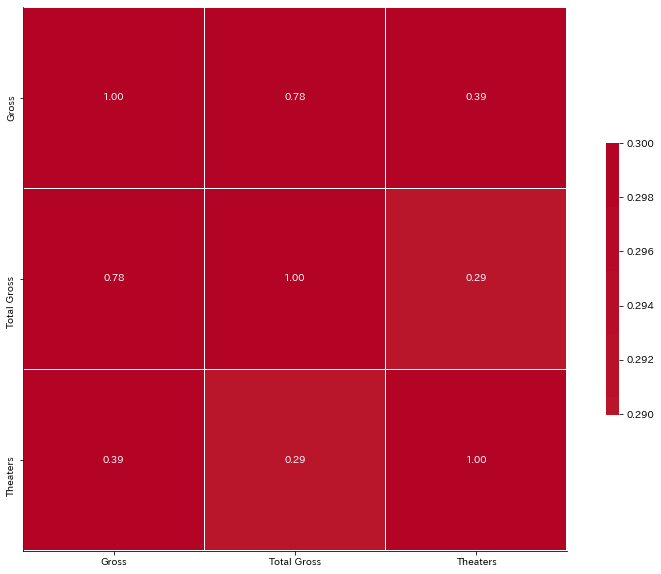

In [417]:
check_df = df[['Gross','Total Gross','Theaters']]
corr = check_df.corr()
g = sns.heatmap(corr,  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
g.figure.set_size_inches(14,10)

plt.show()

In [428]:
df.head(1)

,タイトル(日本名),タイトル(英名),製作日,上映日：製作国：上映時間,年(上映日),月(上映日),日(上映日),製作国,上映時間,ジャンル,監督,脚本,原作,キャスト,URL,Rank,Title,Title (ja),Theaters,Distributor,Gross,Total Gross,age,directors,writers,casts,,リチャード・E・グラント,マ・ドンソク,吉川靖子,花江夏樹,江原正士,スタンリー・トゥッチ,デヴィッド・ベッカム,イアン・グレン,鈴木昴秀,小杉十郎太,松岡禎丞,シェー・ウィガム,ジョン・タトゥーロ,...,ジャンル_西部劇,ジャンル_伝記,ジャンル_パニック,ジャンル_オムニバス,ジャンル_ドキュメンタリー,ジャンル_スポーツ,ジャンル_単発ドラマ,製作国_アメリカ,製作国_日本,製作国_フランス,製作国_オランダ,製作国_イギリス,製作国_オーストラリア,製作国_カナダ,製作国_香港,製作国_中国,製作国_韓国,製作国_スペイン,製作国_ハンガリー,映画配給会社_Walt Disney Pictures,映画配給会社_Toho-Towa,映画配給会社_Toho,映画配給会社_Universal Pictures International (UPI),映画配給会社_none,映画配給会社_Warner Bros.,映画配給会社_Sony Pictures Releasing,映画配給会社_Aniplex,映画配給会社_Toei Company,映画配給会社_Paramount Pictures International,映画配給会社_Shochiku,映画配給会社_20th Century Fox International,映画配給会社_Kadokawa,映画配給会社_Asmik Ace Entertainment,映画配給会社_Showgate,映画配給会社_GAGA,映画配給会社_Kino Films,映画配給会社_Avex Entertainment,映画配給会社_Twin Film,映画配給会社_Phantom Film,映画配給会社_Presidio
0,美女と野獣,Beauty and The Beast,2017年,上映日：2017年04月21日 ／ 製作国：アメリカ ／ 上映時間：130分,2017,4,21,アメリカ,130,恋愛ミュージカル,['ビル・コンドン'],['スティーヴン・チョボスキー'],[],"['ビル・コンドン', 'スティーヴン・チョボスキー', 'エマ・ワトソン', 'ダン・ステ...",https://filmarks.com/movies/61335,1,Beauty and the Beast,美女と野獣,773,Walt Disney Pictures,107918441,110790534,2017,ビル・コンドン,スティーヴン・チョボスキー,"ビル・コンドン, スティーヴン・チョボスキー, エマ・ワトソン, ダン・スティーヴンス, ル...",1,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [429]:
drop_cols=[
           '製作日','上映日：製作国：上映時間','ジャンル','製作国',
           '監督','脚本','原作','キャスト',
           'Title','Title (ja)','Rank','URL','Distributor'
           'writers','directors','casts'
]
df = df.drop(drop_cols, axis=1)

In [434]:
df.head(2)

,タイトル(日本名),タイトル(英名),年(上映日),月(上映日),日(上映日),上映時間,Theaters,Gross,Total Gross,age,,リチャード・E・グラント,マ・ドンソク,吉川靖子,花江夏樹,江原正士,スタンリー・トゥッチ,デヴィッド・ベッカム,イアン・グレン,鈴木昴秀,小杉十郎太,松岡禎丞,シェー・ウィガム,ジョン・タトゥーロ,アーヴィン・ウェルシュ,江藤漢斉,アミア・ミラー,太田莉菜,グェンドリン・クリスティー,ナタリー・エマニュエル,ピーター・ストーメア,真飛聖,平田研也,ベロニカ・グゥ,松村沙友理,小林稔侍,緋田康人,アントニオ・ネグレ,ライリー・キーオ,カーソン・ローム,...,ジャンル_西部劇,ジャンル_伝記,ジャンル_パニック,ジャンル_オムニバス,ジャンル_ドキュメンタリー,ジャンル_スポーツ,ジャンル_単発ドラマ,製作国_アメリカ,製作国_日本,製作国_フランス,製作国_オランダ,製作国_イギリス,製作国_オーストラリア,製作国_カナダ,製作国_香港,製作国_中国,製作国_韓国,製作国_スペイン,製作国_ハンガリー,映画配給会社_Walt Disney Pictures,映画配給会社_Toho-Towa,映画配給会社_Toho,映画配給会社_Universal Pictures International (UPI),映画配給会社_none,映画配給会社_Warner Bros.,映画配給会社_Sony Pictures Releasing,映画配給会社_Aniplex,映画配給会社_Toei Company,映画配給会社_Paramount Pictures International,映画配給会社_Shochiku,映画配給会社_20th Century Fox International,映画配給会社_Kadokawa,映画配給会社_Asmik Ace Entertainment,映画配給会社_Showgate,映画配給会社_GAGA,映画配給会社_Kino Films,映画配給会社_Avex Entertainment,映画配給会社_Twin Film,映画配給会社_Phantom Film,映画配給会社_Presidio
0,美女と野獣,Beauty and The Beast,2017,4,21,130,773,107918441,110790534,2017,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,怪盗グルーのミニオン大脱走,Despicable Me 3,2017,7,21,90,375,64950363,66229119,2017,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


#前処理済みデータとして保存

In [435]:
df.to_csv('/content/drive/MyDrive/Movies/data/prepro_data/data_2017.csv', index=False)